In This Project we predict the price of the airplane using regression technique,
and which factor affects the price of the arplane we try to find from the below dataset which i have got from the internet.

In [1]:
import pandas as pd
import numpy as np

In [2]:
bud=pd.read_csv("C:\\Users\\ACER\\Documents\\Zoom\\business.csv")

In [3]:
bud

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,17:00,Hyderabad,"81,585"


In [4]:
bud.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
dtype: object

In [5]:
bud["stop"].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                   81489
non-stop                                                                      8102
2+-stop                                                                       1083
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t              810
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t              776
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t              257
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t            242
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t              152
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t               93
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t               86
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t       75
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t         71
1-st

In [6]:
import re
bud["stop"]=bud["stop"].str.replace("\n"," ")
bud["stop"]=bud["stop"].str.replace("\t"," ")

In [7]:
bud[['stop',"Route"]]= bud['stop'].str.split(' ',1,expand=True)

In [8]:
bud["stop"].value_counts()

1-stop      84302
non-stop     8102
2+-stop      1083
Name: stop, dtype: int64

In [9]:
bud["Route"].value_counts()

                                            81489
                                             8102
            Via IDR                           810
            Via IXU                           776
            Via PAT                           257
            Via Patna                         242
            Via BBI                           152
            Via STV                            93
            Via IXE                            86
            Via Bhubaneswar                    75
            Via Hyderabad                      71
            Via Delhi                          59
            Via Raipur                         43
            Via Chennai                        42
            Via Guwahati                       29
            Via VTZ                            17
            Via Kolkata                        14
            Via NDC                            14
            Via RPR                            13
            Via Lucknow                        10


In [10]:
#bud["Route"]=bud["Route"].replace("",np.nan,regex = True)

In [11]:
bud['Route']=bud[['Route']].apply(lambda x: x.str.strip()).replace('',np.nan)

In [12]:
bud["Route"].value_counts()

Via IDR            810
Via IXU            776
Via PAT            257
Via Patna          242
Via BBI            152
Via STV             93
Via IXE             86
Via Bhubaneswar     75
Via Hyderabad       71
Via Delhi           59
Via Raipur          43
Via Chennai         42
Via Guwahati        29
Via VTZ             17
Via NDC             14
Via Kolkata         14
Via RPR             13
Via Lucknow         10
Via GAU              3
Via GAY              3
Via Surat            3
Via HYD              1
Name: Route, dtype: int64

In [13]:

#bud["stop"][bud["stop"].str.contains("1-stop")] = "1-stop"

In [14]:
bud.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'Route'],
      dtype='object')

In [15]:
bud["stop"].value_counts()

1-stop      84302
non-stop     8102
2+-stop      1083
Name: stop, dtype: int64

In [16]:
#map string values in the total stops column into integer values
'''dic={'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4}

bud['Stops']=df['stops'].map(dic)
bud['Stops'].value_counts()'''
from sklearn.preprocessing import LabelEncoder
bud_stop = LabelEncoder()
bud_stop.fit(bud['stop'])
bud["stop"] = bud_stop.transform(bud['stop'])

In [17]:
bud["stop"].value_counts()

0    84302
2     8102
1     1083
Name: stop, dtype: int64

In [18]:
bud["airline"].value_counts()

Vistara      60589
Air India    32898
Name: airline, dtype: int64

In [19]:
bud["from"].value_counts()

Mumbai       19858
Delhi        18316
Bangalore    16441
Kolkata      13473
Hyderabad    12870
Chennai      12529
Name: from, dtype: int64

In [20]:
bud["to"].value_counts()

Mumbai       18991
Delhi        16707
Bangalore    16198
Kolkata      14758
Hyderabad    13675
Chennai      13158
Name: to, dtype: int64

In [21]:
bud["ch_code"].value_counts()

UK    60589
AI    32898
Name: ch_code, dtype: int64

In [22]:
bud.duplicated().sum()

0

In [23]:
bud['ch_code']=bud.ch_code.astype('category').cat.codes

In [24]:
bud["ch_code"].value_counts()

1    60589
0    32898
Name: ch_code, dtype: int64

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
bud['airline'] = bud['airline'].map(dict(zip(['Vistara','Air India'],[0,1])))

In [27]:
bud["airline"].value_counts()

0    60589
1    32898
Name: airline, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
bud_from = LabelEncoder()
bud_from.fit(bud['from'])
bud["from"] = bud_from.transform(bud['from'])

In [29]:
bud["from"].value_counts()

5    19858
2    18316
0    16441
4    13473
3    12870
1    12529
Name: from, dtype: int64

In [30]:
bud_from.fit(bud["to"])

bud['to']=bud_from.transform(bud["to"])

In [31]:
bud['to'].value_counts()

5    18991
2    16707
0    16198
4    14758
3    13675
1    13158
Name: to, dtype: int64

In [32]:
bud['price'] = bud['price'].str.replace(',', '').astype(float)

In [33]:
bud['price']

0        25612.0
1        25612.0
2        42220.0
3        44450.0
4        46690.0
          ...   
93482    69265.0
93483    77105.0
93484    79099.0
93485    81585.0
93486    81585.0
Name: price, Length: 93487, dtype: float64

Airline-0 = Vistara, Airline - 1 is Air India


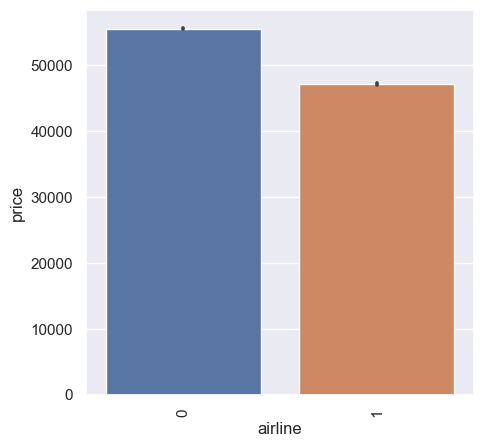

In [34]:
sns.set(rc={"figure.figsize" :(5,5)})
ax = sns.barplot(data=bud,x='airline',y='price')
ax.tick_params(axis='x',rotation=90)
print("Airline-0 = Vistara, Airline - 1 is Air India")

<AxesSubplot:xlabel='airline', ylabel='price'>

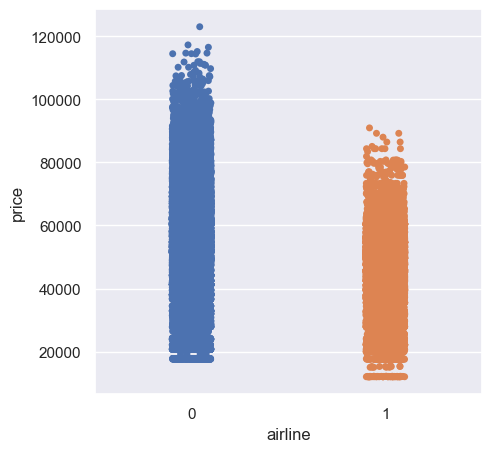

In [35]:
sns.stripplot(y='price',x='airline',data=bud)

Mumbai = 5
Delhi = 2
Bangalore  = 0
Kolkata  = 4
Hyderabad = 3
Chennai  = 1 


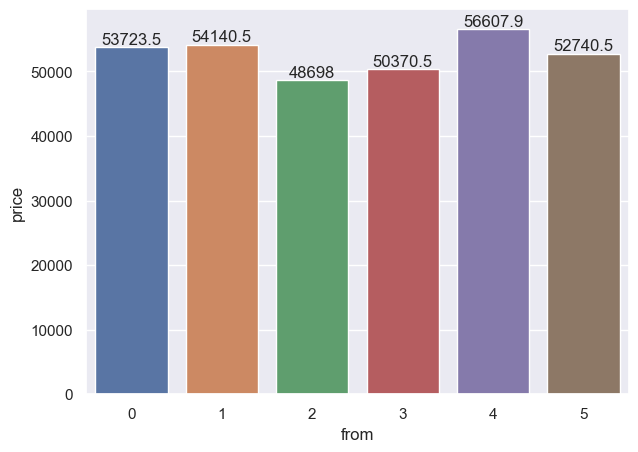

In [36]:
print("""Mumbai = 5
Delhi = 2
Bangalore  = 0
Kolkata  = 4
Hyderabad = 3
Chennai  = 1 """)
plt.figure(figsize=(7,5))
ax= sns.barplot(data=bud,x='from',y='price',errwidth = 0)
ax.bar_label(ax.containers[0])
plt.show()


Mumbai = 5
Delhi = 2
Bangalore  = 0
Kolkata  = 4
Hyderabad = 3
Chennai  = 1 


<AxesSubplot:xlabel='to', ylabel='price'>

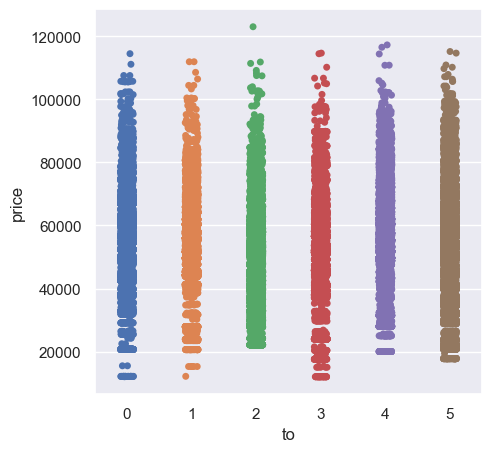

In [37]:
print("""Mumbai = 5
Delhi = 2
Bangalore  = 0
Kolkata  = 4
Hyderabad = 3
Chennai  = 1 """)
sns.stripplot(y='price',x='to',data=bud)

Mumbai = 5
Delhi = 2
Bangalore  = 0
Kolkata  = 4
Hyderabad = 3
Chennai  = 1 


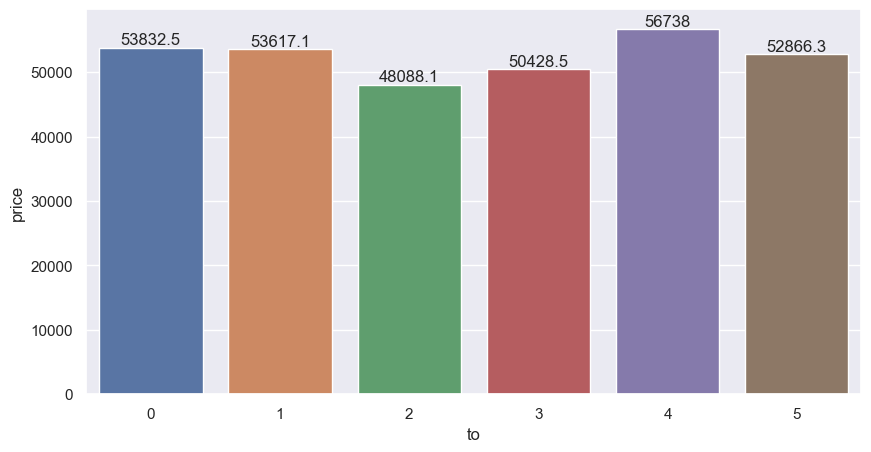

In [38]:
print("""Mumbai = 5
Delhi = 2
Bangalore  = 0
Kolkata  = 4
Hyderabad = 3
Chennai  = 1 """)
plt.figure(figsize=(10,5))
ax = sns.barplot(data=bud,x='to',y='price',errwidth=0)

for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [39]:
bud['Duration_hour']=bud['time_taken'].str.split('h').str[0]
bud['Duration_min']=bud['time_taken'].str.split('h').str[1].replace(['m'],'')
#df['Duration_min']=df['Duration_min'].apply(lambda i:i[:-1]) it is not work
bud['Duration_min']=bud['Duration_min'].str[:-1]

In [40]:
# those two rows make an error when I want to convert them to integer so I will drop it 
bud 

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Route,Duration_hour,Duration_min
0,11-02-2022,1,0,868,18:00,2,02h 00m,2,20:00,5,25612.0,NaN,02,00
1,11-02-2022,1,0,624,19:00,2,02h 15m,2,21:15,5,25612.0,NaN,02,15
2,11-02-2022,1,0,531,20:00,2,24h 45m,0,20:45,5,42220.0,NaN,24,45
3,11-02-2022,1,0,839,21:25,2,26h 30m,0,23:55,5,44450.0,NaN,26,30
4,11-02-2022,1,0,544,17:15,2,06h 40m,0,23:55,5,46690.0,NaN,06,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,0,1,822,09:45,1,10h 05m,0,19:50,3,69265.0,NaN,10,05
93483,31-03-2022,0,1,826,12:30,1,10h 25m,0,22:55,3,77105.0,NaN,10,25
93484,31-03-2022,0,1,832,07:05,1,13h 50m,0,20:55,3,79099.0,NaN,13,50
93485,31-03-2022,0,1,828,07:00,1,10h 00m,0,17:00,3,81585.0,NaN,10,00


In [41]:
bud.dtypes

date              object
airline            int64
ch_code             int8
num_code           int64
dep_time          object
from               int32
time_taken        object
stop               int32
arr_time          object
to                 int32
price            float64
Route             object
Duration_hour     object
Duration_min      object
dtype: object

In [42]:
bud["Duration_hour"]=bud["Duration_hour"].astype(int)


In [43]:
bud["Duration_min"]=bud["Duration_min"].astype(int)

In [44]:
bud.dtypes

date              object
airline            int64
ch_code             int8
num_code           int64
dep_time          object
from               int32
time_taken        object
stop               int32
arr_time          object
to                 int32
price            float64
Route             object
Duration_hour      int32
Duration_min       int32
dtype: object

In [45]:
def convert_to_minutes(h):
    if h>12:
        return (h-12)*60
    else:
        return h*60
    
bud['Duration_hour']=bud['Duration_hour'].apply(convert_to_minutes)
bud['Duration_min']=bud['Duration_hour']+bud['Duration_min']
bud.drop(columns=['Duration_hour',"time_taken"],inplace=True)
bud.head()

,date,airline,ch_code,num_code,dep_time,from,stop,arr_time,to,price,Route,Duration_min
0,11-02-2022,1,0,868,18:00,2,2,20:00,5,25612.0,NaN,120
1,11-02-2022,1,0,624,19:00,2,2,21:15,5,25612.0,NaN,135
2,11-02-2022,1,0,531,20:00,2,0,20:45,5,42220.0,NaN,765
3,11-02-2022,1,0,839,21:25,2,0,23:55,5,44450.0,NaN,870
4,11-02-2022,1,0,544,17:15,2,0,23:55,5,46690.0,NaN,400


<AxesSubplot:xlabel='price', ylabel='Duration_min'>

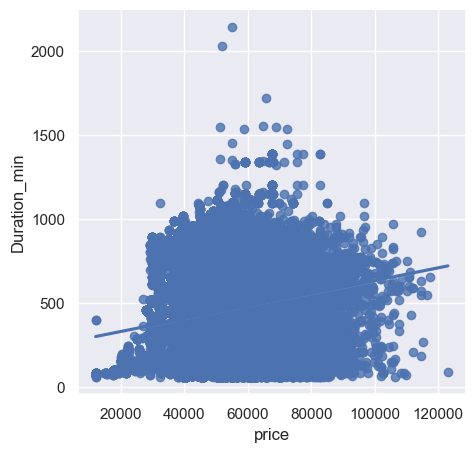

In [46]:
sns.regplot(x='price',y='Duration_min',data=bud)

In [47]:
bud.corr()

,airline,ch_code,num_code,from,stop,to,price,Duration_min
airline,1.000000,-1.000000,-0.691739,0.045208,0.012344,0.047192,-0.307322,0.010969
ch_code,-1.000000,1.000000,0.691739,-0.045208,-0.012344,-0.047192,0.307322,-0.010969
num_code,-0.691739,0.691739,1.000000,0.115092,-0.004274,-0.133620,0.221424,-0.044031
from,0.045208,-0.045208,0.115092,1.000000,0.022661,-0.232568,0.016159,-0.000665
stop,0.012344,-0.012344,-0.004274,0.022661,1.000000,0.014762,-0.552149,-0.378008
to,0.047192,-0.047192,-0.133620,-0.232568,0.014762,1.000000,0.026977,-0.012072
price,-0.307322,0.307322,0.221424,0.016159,-0.552149,0.026977,1.000000,0.197141
Duration_min,0.010969,-0.010969,-0.044031,-0.000665,-0.378008,-0.012072,0.197141,1.000000


So, in the data we can clearly see the price of airplane was affected by the which type of airplane service we choose and which route that flight travel, number of stops during the travel the flight have and what stop it is, and how many hours it fly to reach the destination [distance].

In [48]:
bud

,date,airline,ch_code,num_code,dep_time,from,stop,arr_time,to,price,Route,Duration_min
0,11-02-2022,1,0,868,18:00,2,2,20:00,5,25612.0,NaN,120
1,11-02-2022,1,0,624,19:00,2,2,21:15,5,25612.0,NaN,135
2,11-02-2022,1,0,531,20:00,2,0,20:45,5,42220.0,NaN,765
3,11-02-2022,1,0,839,21:25,2,0,23:55,5,44450.0,NaN,870
4,11-02-2022,1,0,544,17:15,2,0,23:55,5,46690.0,NaN,400
...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,0,1,822,09:45,1,0,19:50,3,69265.0,NaN,605
93483,31-03-2022,0,1,826,12:30,1,0,22:55,3,77105.0,NaN,625
93484,31-03-2022,0,1,832,07:05,1,0,20:55,3,79099.0,NaN,110
93485,31-03-2022,0,1,828,07:00,1,0,17:00,3,81585.0,NaN,600


<AxesSubplot:xlabel='price', ylabel='Count'>

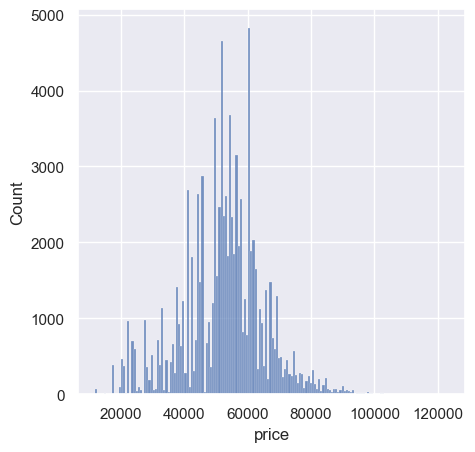

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(bud["price"])

In [46]:
#X=bud[["airline","ch_code","num_code","from","to"]]
#y=bud[["price"]]

<AxesSubplot:>

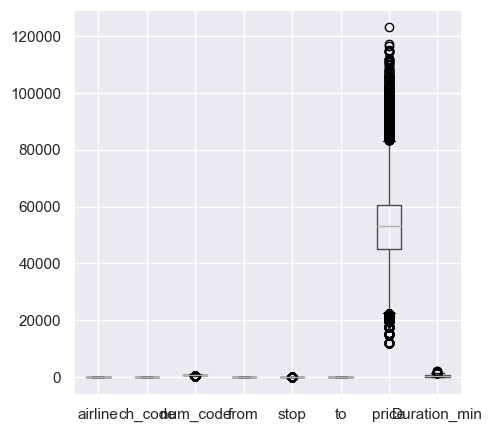

In [90]:
bud.boxplot()

In [88]:
bud.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from', 'stop',
       'arr_time', 'to', 'price', 'Route', 'Duration_min'],
      dtype='object')

In [49]:
X=bud.drop(columns=['price','date','dep_time','arr_time','Route','num_code']) # airline-0,ch-code-1,from-3,stop-0,to-1,Du-min- 420
y=bud['price']
X.shape,y.shape

((93487, 6), (93487,))

In [50]:
from sklearn.model_selection import train_test_split
X=X.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)

In [51]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((65440, 6), (28047, 6), (65440,), (28047,))

In [52]:
X_train

array([[  0,   1,   3,   0,   1, 420],
       [  0,   1,   0,   0,   1, 810],
       [  0,   1,   2,   0,   5, 110],
       ...,
       [  0,   1,   0,   0,   3, 175],
       [  1,   0,   2,   0,   5, 740],
       [  0,   1,   3,   0,   4, 850]], dtype=int64)

In [53]:
y_train

79517    41314.0
53477    44280.0
3861     70793.0
35542    57453.0
70278    39499.0
          ...   
21440    34460.0
73349    17794.0
50057    56588.0
5192     59033.0
77708    58394.0
Name: price, Length: 65440, dtype: float64

In [54]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


from sklearn.model_selection import cross_val_score


from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

In [55]:
CV = []
train_scores = []
test_scores = []

def pred_model(model):
    # Training model
    model.fit(X_train,y_train.values)
            
    # score of train set
    train_model_score = model.score(X_train,y_train)
    train_scores.append(round(train_model_score,2))
    y_pred_train=model.predict(X_train)
    
    # score of test set
    test_model_score = model.score(X_test,y_test)
    test_scores.append(round(test_model_score,2))
    y_pred_test=model.predict(X_test)
    
    # train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train score :",round(train_model_score,2))
    print("Test score :",round(test_model_score,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    print("Mean absolute error for train :",mean_absolute_error(y_train,y_pred_train))
    print("Median absolute error for train :",median_absolute_error(y_train,y_pred_train))
    print("Mean absolute error for test :",mean_absolute_error(y_test,y_pred_test))
    print("Median absolute error for test :",mean_absolute_error(y_test,y_pred_test))
    
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train[:100]-y_pred_train[:100]),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test[:100], y = y_pred_test[:100])
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train score : 0.4
Test score : 0.4
Train CV scores : [0.39451704 0.40028719 0.40829278 0.39232753 0.40650036]
Train CV mean : 0.4
Mean absolute error for train : 7522.515491248467
Median absolute error for train : 5525.398321176006
Mean absolute error for test : 7580.634917689801
Median absolute error for test : 7580.634917689801


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


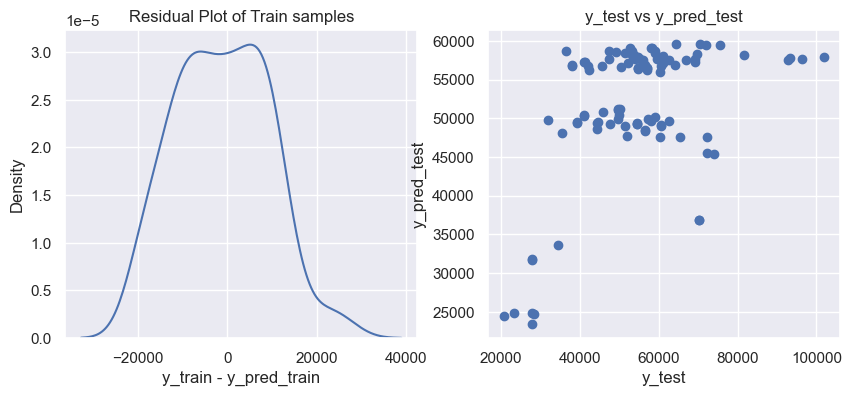

In [56]:
lr = LinearRegression()
pred_model(lr)

Train score : 0.86
Test score : 0.84
Train CV scores : [0.82514354 0.82790786 0.83251177 0.83393716 0.84254257]
Train CV mean : 0.83
Mean absolute error for train : 2825.2671953425556
Median absolute error for train : 1381.7392244176735
Mean absolute error for test : 2958.157436548938
Median absolute error for test : 2958.157436548938


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


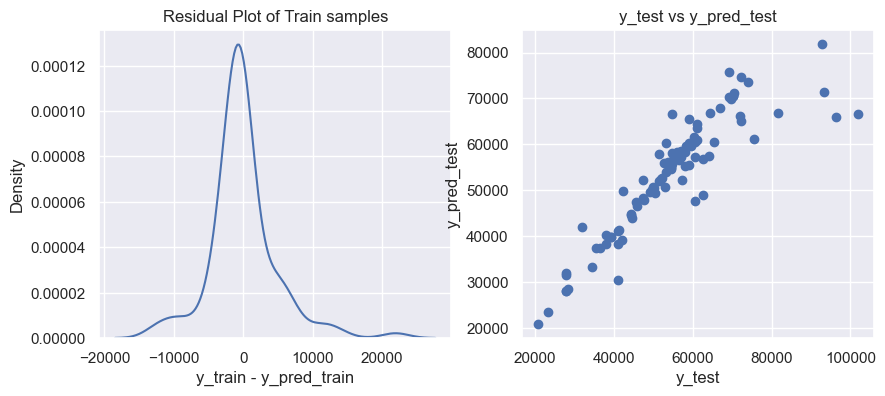

In [57]:
RF = RandomForestRegressor(max_depth=30,min_samples_split=20,n_estimators=100)
RF.fit(X_train,y_train)
pred_model(RF)

In [58]:
predicted_price=RF.predict([[2,1,3,1,0,420],[2,0,2,0,1,321],[1,1,5,1,1,325],[0,0,3,0,5,156],[0,1,3,0,1,420]])  #[airline-0,ch-code-1,from-3,stop-0,to-1,Du-min- 420]=[price]

In [59]:
predicted_price

array([69949.46270537, 45388.86728875, 72425.69974271, 55439.28922599,
       41644.20607134])

Train score : 0.79
Test score : 0.78
Train CV scores : [0.77400119 0.7771047  0.78958313 0.7856814  0.79139425]
Train CV mean : 0.78
Mean absolute error for train : 3909.084616036637
Median absolute error for train : 2457.94140625
Mean absolute error for test : 4017.3418078777363
Median absolute error for test : 4017.3418078777363


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


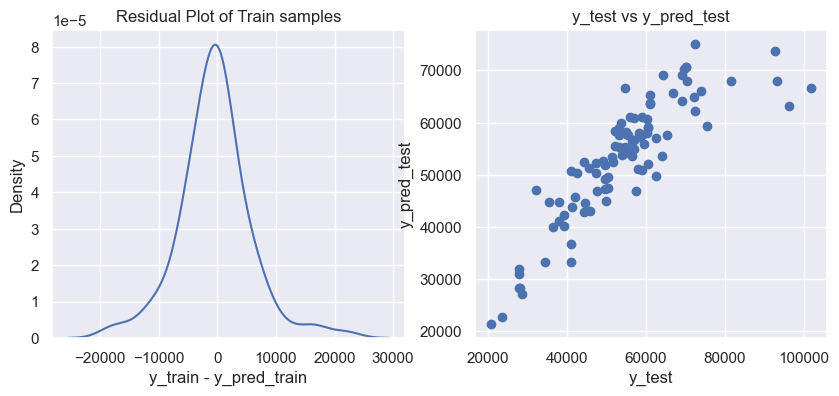

In [151]:
XGBR = XGBRegressor()
pred_model(XGBR)

In [152]:
predict_price=XGBR.predict([[2,1,3,1,0,420],[2,0,2,0,1,321],[1,1,5,1,1,325],[0,0,3,0,5,156],[0,1,3,0,1,420]])

In [153]:
predict_price

array([60031.78 , 46239.703, 57238.418, 63049.594, 51391.76 ],
      dtype=float32)

In [60]:
import pickle

In [61]:
pickle_out=open("Flight_model.pkl","wb")
pickle.dump(RF, pickle_out)
pickle_out.close()